In [ ]:
# Name: Akash Singh
# student Id: 1060237
# NLP Assignement 2

In [36]:
import re
import json
import sys
import spacy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.spatial.distance import cosine
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import defaultdict
from sklearn.model_selection import GridSearchCV
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [37]:
#This function remove newline char

def preprocess_doc(doc):           
    doc = doc.replace('\n',' ')    
    return(doc)

In [38]:
#This function remove punctuation, stop word, url, extra space, and lemmetaize and lower casing 

lemmatizer = spacy.lang.en.English()
def lemmatizer_tokenizer(doc):
    tokens = lemmatizer(doc)
    return [token.lemma_.lower() for token in tokens if not token.is_stop | token.is_punct | token.is_space | token.like_url]
    

In [39]:
# This function extract text, label, and ids from the trainig and development data set

train_file = 'new_train.json'    #new expanded training data
dev_file = 'dev.json'            #development data

def process_text(file_name):
    f = open(file_name, 'r', encoding = 'utf-8') 
    data = json.load(f)
    text_list = []
    id_list = []
    label_list = []
    for doc_id, doc_dic in data.items():
        text = doc_dic["text"] 
        text_list.append(text)
        label = doc_dic["label"]
        label_list.append(label)
        id_list.append(doc_id)
    return text_list,label_list,id_list


train_text_list, train_label_list, train_id_list = process_text(train_file)
dev_text_list, dev_label_list, dev_id_list = process_text(dev_file)


In [40]:
# This function extract text, and ids from the test data set

test_file = 'test-unlabelled.json' #test data

def process_test_file(file_name):
    f = open(file_name, 'r', encoding = 'utf-8')
    data = json.load(f)
    text_list = []
    id_list = []
    for doc_id, doc_dic in data.items():
        text = doc_dic["text"]
        text_list.append(text)
        id_list.append(doc_id)
    return text_list,id_list
        

test_text_list, test_id_list = process_test_file(test_file)

In [41]:
#creating dictionary of vectorizers for chosing optimal parameters

dict_vec = {'TFIDF_1': TfidfVectorizer(ngram_range=(1,3),
                                      max_df = 0.8, min_df = 3, 
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),                            
            'TFIDF_2': TfidfVectorizer(ngram_range=(1,3),
                                      max_df = 0.7, min_df = 3, 
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            'TFIDF_3': TfidfVectorizer(ngram_range=(1,5),
                                      max_df = 0.7, min_df = 2, 
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            'TFIDF_4': TfidfVectorizer(ngram_range=(1,7),
                                      max_df = 0.7, min_df = 1, 
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            '1_BOWV': CountVectorizer(ngram_range=(1,3),
                                      max_df = 0.8, min_df = 3,
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            '2_BOWV': CountVectorizer(ngram_range=(1,3),
                                      max_df = 0.7, min_df = 3,
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            '3_BOWV': CountVectorizer(ngram_range=(1,5),
                                      max_df = 0.7, min_df = 2,
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
            '4_BOWV': CountVectorizer(ngram_range=(1,7),
                                      max_df = 0.7, min_df = 1,
                                      preprocessor=preprocess_doc, 
                                      tokenizer=lemmatizer_tokenizer),
           }

In [42]:
#creating dictionary of different machine learning models for chosing best performer

dict_model = {'Naive Bayes': MultinomialNB(),
              'Logistic Regression': LogisticRegression(),
              'SGD': SGDClassifier(),
              'LinearSVC': LinearSVC(),
              'Decision Tree': DecisionTreeClassifier(max_depth=6),    
              'XGBoost': XGBClassifier(max_depth=6)}

In [43]:
#Training the list of models to pick best one's out of it.

dict_res = defaultdict(list)
for vec_name, vectorizer in dict_vec.items():                   #looping through list of vectorizers
    X_train_vec = vectorizer.fit_transform(train_text_list)
    X_dev_vec  = vectorizer.transform(dev_text_list)
    for mod_name, model in dict_model.items():                  #Looping through list of models
        model.fit(X_train_vec, train_label_list);
        y_pred = model.predict(X_dev_vec)
        precision = precision_score(dev_label_list, y_pred)
        recall = recall_score(dev_label_list, y_pred)
        f1 = f1_score(dev_label_list, y_pred)
        dict_res['Model_Name'].append(mod_name)
        dict_res['Vec_Name'].append(vec_name)
        dict_res['F1'].append(f1)
        dict_res['Precision'].append(precision)
        dict_res['Recall'].append(recall)
    df_res = pd.DataFrame(dict_res)
print(df_res)


c:\users\akash singh\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\akash singh\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


             Model_Name Vec_Name        F1  Precision  Recall
0           Naive Bayes  TFIDF_1  0.704225   0.543478    1.00
1   Logistic Regression  TFIDF_1  0.806723   0.695652    0.96
2                   SGD  TFIDF_1  0.810345   0.712121    0.94
3             LinearSVC  TFIDF_1  0.820513   0.716418    0.96
4         Decision Tree  TFIDF_1  0.786885   0.666667    0.96
5               XGBoost  TFIDF_1  0.753846   0.612500    0.98
6           Naive Bayes  TFIDF_2  0.704225   0.543478    1.00
7   Logistic Regression  TFIDF_2  0.806723   0.695652    0.96
8                   SGD  TFIDF_2  0.817391   0.723077    0.94
9             LinearSVC  TFIDF_2  0.820513   0.716418    0.96
10        Decision Tree  TFIDF_2  0.780488   0.657534    0.96
11              XGBoost  TFIDF_2  0.753846   0.612500    0.98
12          Naive Bayes  TFIDF_3  0.671141   0.505051    1.00
13  Logistic Regression  TFIDF_3  0.806723   0.695652    0.96
14                  SGD  TFIDF_3  0.820513   0.716418    0.96
15      

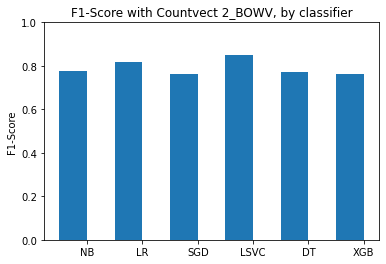

In [44]:
# Bar plot for F1-score on development set, for different classifiers with CountVectorizier= 2_BOWV 

%matplotlib inline
import matplotlib.pyplot as plt

F1_2_BOWV = [0.7768,0.8181,0.7643,0.8490,0.7740,0.7633]    #F1 score for CountVectorizer 2_BOWV
plt.bar([num + 0.25 for num in range(len(F1_2_BOWV))], F1_2_BOWV,0.5)
plt.ylabel('F1-Score')
plt.title('F1-Score with Countvect 2_BOWV, by classifier')
plt.ylim([0.0,1])
plt.xticks([num + 0.5 for num in range(len(F1_2_BOWV))], ('NB', 'LR', 'SGD', 'LSVC', 'DT', 'XGB'))
plt.show()

In [46]:
#Using Grid-Search, Threshold value tuining and custom stop word list for performance improvemnt of LR & LSVC classifiers

dict_res = defaultdict(list)

#List of words from development set instaces which are wrongly classified as positive

stop_words_new = ['predatory', 'accuse', 'emission', 'reduction', 'engage', 'pragmatist', 
                  'scepticism', 'dramatic', 'wedge', 'catastrophe', 'carbon', 'tackle', 
                  'polluter', 'decarbonising', 'plastic', 'package', 'heat', 'rise', 
                  'decarbonise', 'coal', 'market', 'globe', 'fire', 'power', 'incentivise', 
                  'underwrite', 'exporter', 'metallurgical', 'export', 'crisis', 'global', 'warm', 
                  'paris', 'agreement', 'hypnotist', 'dispute', 'calamity', 'hypnotism', 'weaponises', 
                  'party', 'opponent', 'blithely', 'unavoidable', 'inexorable', 'dangerous', 'gillard', 
                  'incomprehensible', 'gamble', 'misdirection', 'strike', 'feminism', 'movement', 
                  'massively', 'striker', 'conversation', 'sensational', 'zealotry', 'fabricate', 
                  'thunberg', 'tragedy', 'furiously', 'dominate', 'destructive', 'argue', 'bushfire',
                  'widespread', 'environmental', 'destruction', 'defunding', 'turnbull', 'innovation', 
                  'agendum', 'economic', 'lapdog', 'puppet', 'fund', 'immune', 'coalition', 'starve', 'unobserved',
                  'unreported', 'unprecedented', 'ferocious', 'untroubled', 'alarm', 'objection', 'wealthy', 
                  'collectively', 'dioxide', 'consequence', 'agendum', 'oil', 'rich', 'fragile', 'resist',
                  'fossil', 'fuel', 'unlawful', 'crowdfunding', 'incompatible', 'lobbyist']

#Final vectorizier with pipiline of process
vectorizer = CountVectorizer(ngram_range=(1,3),
                             max_df = 0.7, min_df = 3,
                             preprocessor=preprocess_doc, 
                             tokenizer=lemmatizer_tokenizer,
                             analyzer='word',
                             stop_words = stop_words_new)
vec_name = '2_BOWV' 

#Custome parameter list for LR & LSVC classifiers used with Grid-Search

params_logit = [{'penalty': ['l2']},          #LR parameters used in pipeline with Grid-search
                {'solver': ['lbfgs']},
                {'C':[1]},
               {'max_iter':[100]}]

params_lsvc = [{'loss':['squared_hinge']},    #LSVC parameters used in pipeline with Grid-search
              {'penalty': ['l2']},
              {'random_state':[42]},
             {'max_iter':[1000]}]



X_train_new = vectorizer.fit_transform(train_text_list)
X_dev_new  = vectorizer.transform(dev_text_list)
    
# Logistic Regression
gs_logit = GridSearchCV(LogisticRegression(), params_logit,
                        scoring='f1', error_score=0.0)
gs_logit_fit = gs_logit.fit(X_train_new, train_label_list)
pred_proba_df = pd.DataFrame(gs_logit_fit.predict_proba(X_dev_new))

#threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99]
threshold_list = [0.80]
for i in threshold_list:
    print ('\n******** Logistic Regression For i = {} threshold******'.format(i))
    y_pred_logit = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    precision_logit = precision_score(dev_label_list, y_pred_logit.iloc[:,1])
    recall_logit = recall_score(dev_label_list, y_pred_logit.iloc[:,1])
    f1_logit = f1_score(dev_label_list, y_pred_logit.iloc[:,1])
    accu_logit = accuracy_score(dev_label_list,y_pred_logit.iloc[:,1])
    dict_res['Model_Name'].append('Logistic Regression')
    dict_res['Vec_Name'].append(vec_name)
    dict_res['F1'].append(f1_logit)
    dict_res['Precision'].append(precision_logit)
    dict_res['Recall'].append(recall_logit)
    
    
#LinearSVC Classifier
gs_lsvm = GridSearchCV(LinearSVC(), params_lsvc,
                       scoring='f1')
gs_lsvm.fit(X_train_new, train_label_list)
y_pred_lsvm = gs_lsvm.predict(X_dev_new)
precision_lsvm = precision_score(dev_label_list, y_pred_lsvm)
recall_lsvm = recall_score(dev_label_list, y_pred_lsvm)
f1_lsvm = f1_score(dev_label_list, y_pred_lsvm)
accu_lsvm = accuracy_score(dev_label_list,y_pred_lsvm)
dict_res['Model_Name'].append('LinearSVC')
dict_res['Vec_Name'].append(vec_name)
dict_res['F1'].append(f1_lsvm)
dict_res['Precision'].append(precision_lsvm)
dict_res['Recall'].append(recall_lsvm)
    
    
    

print(" ")
df_res = pd.DataFrame(dict_res)
print(df_res)


******** Logistic Regression For i = 0.8 threshold******
 
            Model_Name Vec_Name        F1  Precision  Recall
0  Logistic Regression   2_BOWV  0.841121   0.789474     0.9
1            LinearSVC   2_BOWV  0.841121   0.789474     0.9


In [47]:
#Generating predictions on test data set

final_vec = CountVectorizer(ngram_range=(1,3),
                            max_df = 0.7, min_df = 3,
                            preprocessor=preprocess_doc, 
                            tokenizer=lemmatizer_tokenizer,
                            analyzer='word',
                            stop_words = stop_words_new)

logit_params_final = [{'penalty': ['l2']},             #LR parameters used in pipeline with Grid-search
                      {'solver': ['lbfgs']},
                      {'C':[1]},
                      {'max_iter':[100]}]

lsvm_params_final = [{'loss':['squared_hinge']},       #LSVC parameters used in pipeline with Grid-search
                     {'penalty': ['l2']},
                     {'random_state':[42]},
                     {'max_iter':[1000]}]

X_train_fin = final_vec.fit_transform(train_text_list)
X_test_fin  = final_vec.transform(test_text_list)

#Logistic Regression
i = 0.8                                                 #threshold value final
gs_logit = GridSearchCV(LogisticRegression(), logit_params_final, 
                        scoring='f1', error_score=0.0)
gs_logit_fit = gs_logit.fit(X_train_fin, train_label_list)
pred_proba_df = pd.DataFrame(gs_logit_fit.predict_proba(X_test_fin))

##generating prediction on test data for LR
test_pred_gs_logit = pred_proba_df.applymap(lambda x: 1 if x>i else 0)     #applying threshold value 
test_pred_gs_logit = test_pred_gs_logit.iloc[:,1]


#LinearSVC
gs_lsvm = GridSearchCV(LinearSVC(), lsvm_params_final,
                            scoring='f1')
gs_lsvm_fit = gs_lsvm.fit(X_train_fin, train_label_list)

##generating prediction on test data for LSVC
test_pred_gs_lsvm = gs_lsvm_fit.predict(X_test_fin)

In [48]:
##creating test-output.json file for codalab upload

id_dict = {}
label_dict = {}
for ids, label in zip(test_id_list,test_pred_gs_logit):
    id_dict[ids] = {"label":label}

def convert(o):
    if isinstance(o, np.int32): return int(o)  
    raise TypeError
    
with open('test-output.json', 'w') as outfile:
    json.dump(id_dict, outfile,default=convert)